In [1]:
#Khalid Kadri
#Department of computer science
# City, University of London
# London United Kingdom
# Khalid.kadri@city.ac.uk

#Title: A Comparative Analysis of Lewis Hamilton and Sebastian Vettel's Performance in the 2018 Formula 1 Season

#In this analysis, we are interested in understanding how the performance of Lewis Hamilton and Sebastian Vettel in the 2018 Formula 1 season compares. Specifically, we want to determine which driver had the better performance based on various metrics such as number of races, podium finishes, and points earned.

In [2]:
#The data for this analysis was obtained from a user on kaggle and includes detailed information on the races, podium finishes, and points earned by each driver during the 2018 season. We selected this data source because it is a reliable and comprehensive source of information on the Formula 1 season.

In [3]:
import numpy as np
from scipy import stats
from tqdm import tqdm
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

#imported Libraries
circuits_df = pd.read_csv('circuits.csv')
constructor_results_df = pd.read_csv('constructor_results.csv')
constructor_standings_df = pd.read_csv('constructor_standings.csv')
constructors_df = pd.read_csv('constructors.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')
drivers_df = pd.read_csv('drivers.csv')
lap_times_df = pd.read_csv('lap_times.csv')
pit_stops_df = pd.read_csv('pit_stops.csv')
qualifying_df = pd.read_csv('qualifying.csv')
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
seasons_df = pd.read_csv('seasons.csv')
sprint_results_df = pd.read_csv('sprint_results.csv')
status_df = pd.read_csv('status.csv')

# To compare lap times, we  calculate the average lap time for each driver and perform a t-test to determine whether there is a statistically significant difference between the two drivers' average lap times.
# for pit stops, we could calculate the total number of pit stops for each driver and compare the results using a t-test.
# we also compared lap 1 gains or losses, by calculating the total number of lap 1 gains or losses for each driver and compare the results using a t-test.

# Calculate the means and standard deviations of the two samples
#mean1 = np.mean(sample1)
#mean2 = np.mean(sample2)
#std1 = np.std(sample1)
#std2 = np.std(sample2)

# Calculate the t-value and degrees of freedom
#t, p = stats.ttest_ind(sample1, sample2, equal_var=True)
#df = len(sample1) + len(sample2) - 2

# Print the t-value and p-value
#print(f't-value: {t:.3f}')
#print(f'p-value: {p:.3f}')


laptime_df = pd.merge(lap_times_df,drivers_df[['driverId','code','driverRef']],how='left', on='driverId')
laptime_df =pd.merge(laptime_df,races_df[['raceId','name','date','year']],how= 'left', on='raceId')

laptime_df['time']=pd.to_timedelta(laptime_df['milliseconds'], unit='ms')
laptime_df['seconds']=laptime_df['milliseconds']/1000
laptime_df

,raceId,driverId,lap,position,time,milliseconds,code,driverRef,name,date,year,seconds
0,841,20,1,1,0 days 00:01:38.109000,98109,VET,vettel,Australian Grand Prix,2011-03-27,2011,98.109
1,841,20,2,1,0 days 00:01:33.006000,93006,VET,vettel,Australian Grand Prix,2011-03-27,2011,93.006
2,841,20,3,1,0 days 00:01:32.713000,92713,VET,vettel,Australian Grand Prix,2011-03-27,2011,92.713
3,841,20,4,1,0 days 00:01:32.803000,92803,VET,vettel,Australian Grand Prix,2011-03-27,2011,92.803
4,841,20,5,1,0 days 00:01:32.342000,92342,VET,vettel,Australian Grand Prix,2011-03-27,2011,92.342
...,...,...,...,...,...,...,...,...,...,...,...,...
528780,1086,842,65,13,0 days 00:01:25.989000,85989,GAS,gasly,Hungarian Grand Prix,2022-07-31,2022,85.989
528781,1086,842,66,12,0 days 00:01:25.187000,85187,GAS,gasly,Hungarian Grand Prix,2022-07-31,2022,85.187
528782,1086,842,67,12,0 days 00:01:47.355000,107355,GAS,gasly,Hungarian Grand Prix,2022-07-31,2022,107.355
528783,1086,842,68,12,0 days 00:01:37.587000,97587,GAS,gasly,Hungarian Grand Prix,2022-07-31,2022,97.587


In [4]:
#lap analysis for HAM VS VET in 2018
laps_df = laptime_df[(laptime_df['year']==2018)&((laptime_df['code']=='VET')|(laptime_df['code']=='HAM'))].copy()
laps_df.rename(columns={'position':'lap position'},inplace=True)
laps_df = laps_df.merge(results_df[['raceId','driverId','position']],how='left',on=['raceId','driverId'])
laps_df = laps_df.merge(pit_stops_df[['raceId','driverId','lap','stop']],how='left',on=['raceId','driverId','lap'])
laps_df['stop'].fillna(0,inplace=True)
laps_df['stop']=laps_df['stop'].astype(int)
laps_df['stop'][laps_df['stop']==0] = ''
laps_df

C:\Users\kmkad\AppData\Local\Temp\ipykernel_43300\3746640263.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_df['stop'][laps_df['stop']==0] = ''


,raceId,driverId,lap,lap position,time,milliseconds,code,driverRef,name,date,year,seconds,position,stop
0,989,20,58,1,0 days 00:01:28.863000,88863,VET,vettel,Australian Grand Prix,2018-03-25,2018,88.863,1,
1,989,20,57,1,0 days 00:01:26.990000,86990,VET,vettel,Australian Grand Prix,2018-03-25,2018,86.990,1,
2,989,20,56,1,0 days 00:01:27.236000,87236,VET,vettel,Australian Grand Prix,2018-03-25,2018,87.236,1,
3,989,20,55,1,0 days 00:01:26.983000,86983,VET,vettel,Australian Grand Prix,2018-03-25,2018,86.983,1,
4,989,20,54,1,0 days 00:01:26.711000,86711,VET,vettel,Australian Grand Prix,2018-03-25,2018,86.711,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,1009,20,51,2,0 days 00:01:41.450000,101450,VET,vettel,Abu Dhabi Grand Prix,2018-11-25,2018,101.450,2,
2499,1009,20,52,2,0 days 00:01:42.233000,102233,VET,vettel,Abu Dhabi Grand Prix,2018-11-25,2018,102.233,2,
2500,1009,20,53,2,0 days 00:01:41.488000,101488,VET,vettel,Abu Dhabi Grand Prix,2018-11-25,2018,101.488,2,
2501,1009,20,54,2,0 days 00:01:40.867000,100867,VET,vettel,Abu Dhabi Grand Prix,2018-11-25,2018,100.867,2,


19it [00:01, 10.17it/s]C:\Users\kmkad\AppData\Local\Temp\ipykernel_43300\997538898.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,1)
21it [00:02, 10.22it/s]


<Figure size 720x7200 with 0 Axes>

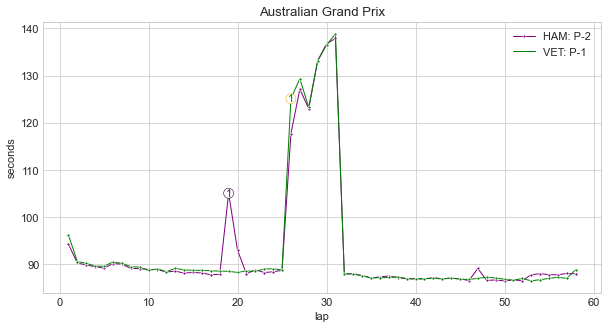

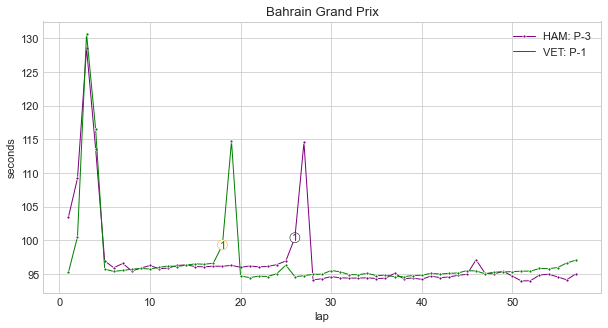

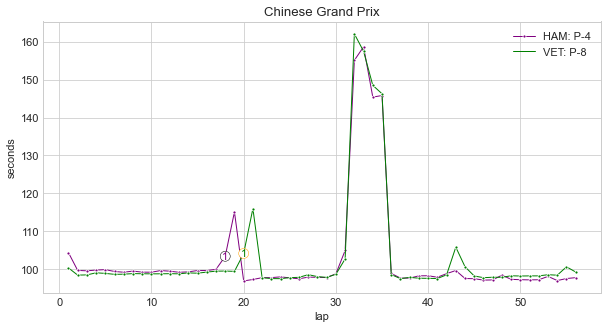

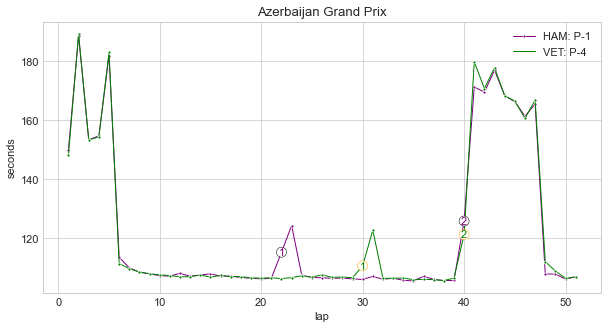

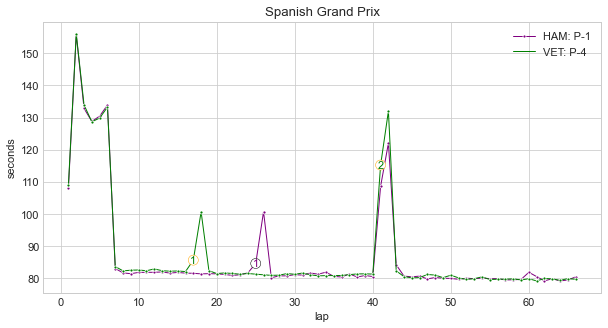

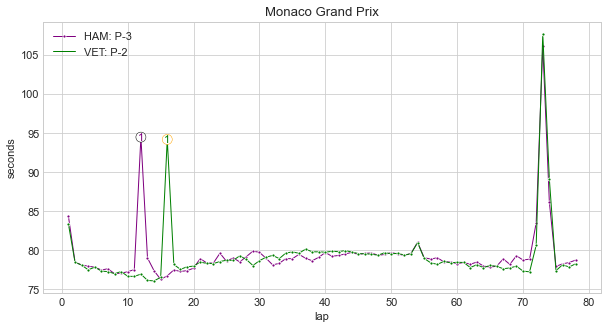

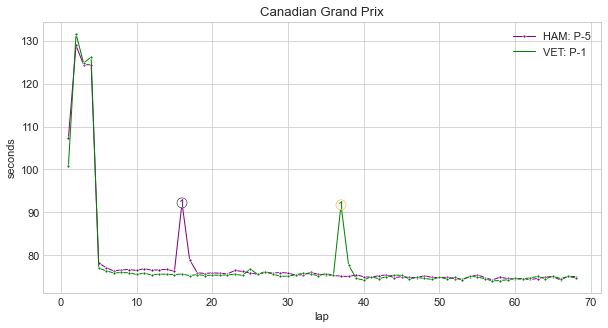

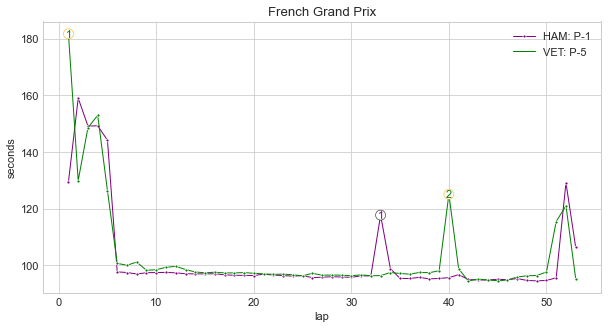

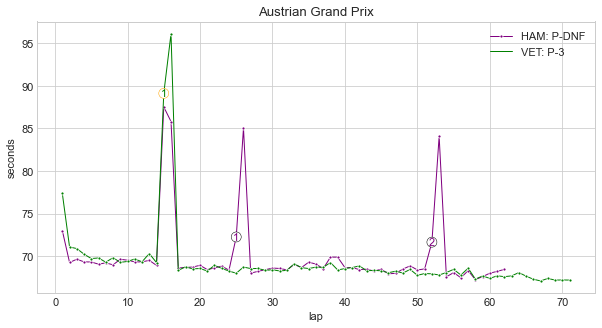

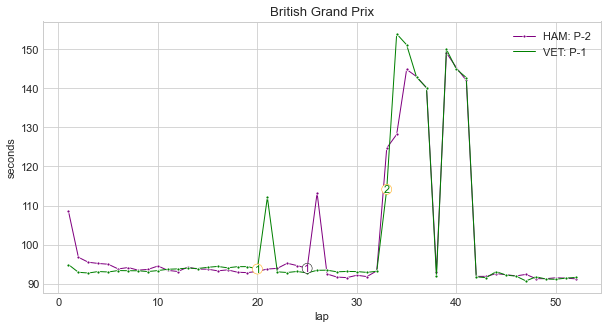

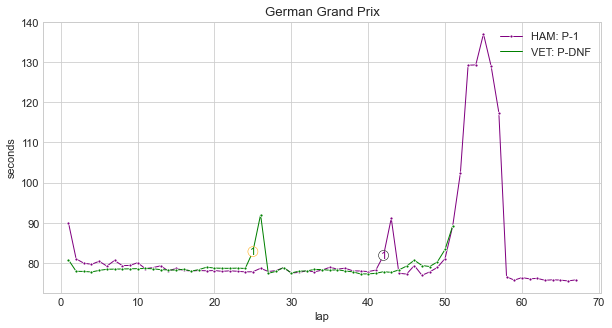

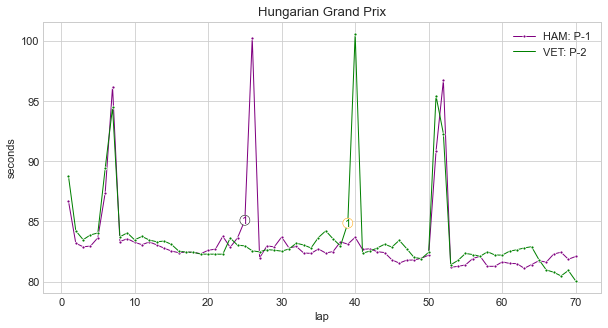

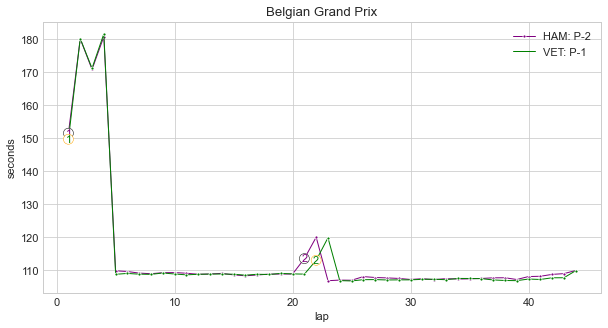

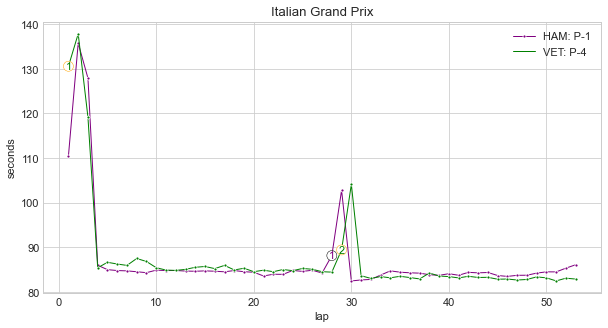

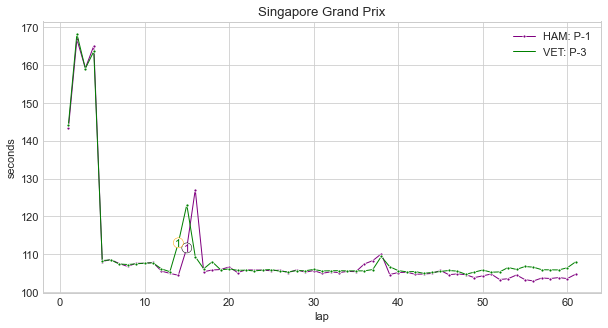

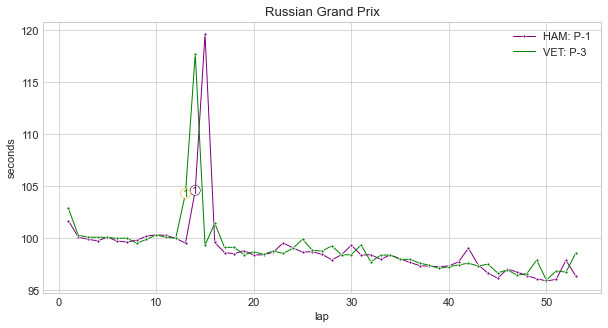

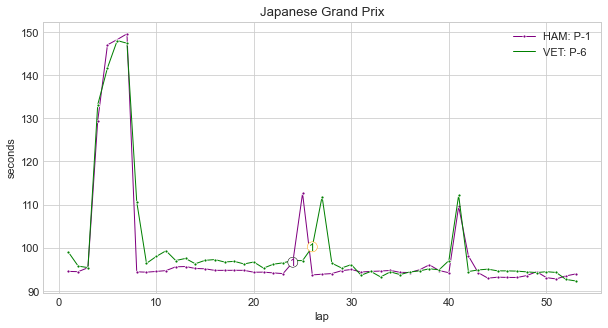

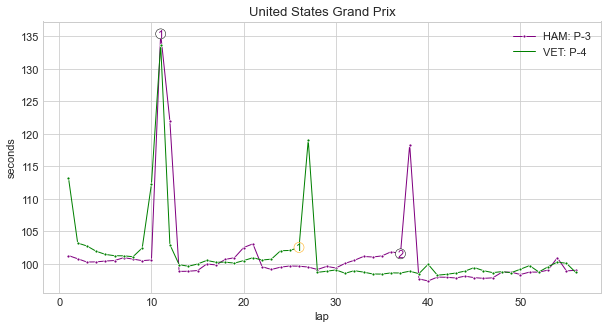

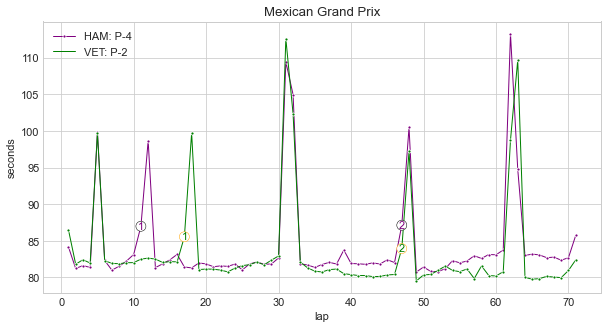

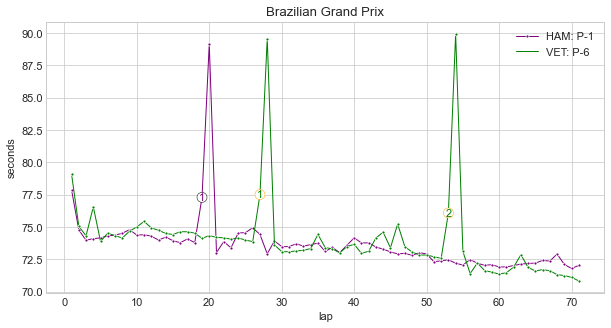

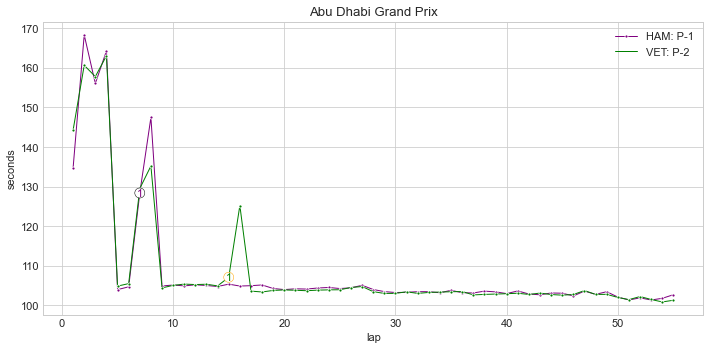

In [5]:
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=10,5
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 11
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize']=11
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['legend.fontsize']=11

plt.figure(figsize=(10, 100))
for i, f in tqdm(enumerate(laps_df['name'].unique())):
    try:
        HAM_pos = list(set(laps_df[(laps_df['name']==f)&(laps_df['code']=='HAM')]['position']))[0]
        if HAM_pos == r'\N':
            HAM_pos = 'DNF'
    except:
        HAM_pos = 'DNS'
    try:
        VET_pos = list(set(laps_df[(laps_df['name']==f)&(laps_df['code']=='VET')]['position']))[0]
        if VET_pos == r'\N':
            VET_pos = 'DNF'
    except:
        VET_pos = 'DNS'
    fig,ax = plt.subplots(1,1)
    plt.title(f)
    sns.lineplot(data=laps_df[(laps_df['name']==f)&(laps_df['code']=='HAM')],
                 x='lap',
                 y='seconds',
                 hue='code',
                 palette=['Purple'],
                 ax=ax,
                 marker='.',
                 # marker_size=3
                 )
    HAM_stops = laps_df[(laps_df['name']==f)&(laps_df['code']=='HAM')]
    for j,label in enumerate(HAM_stops['stop']):
        plt.annotate(label, (HAM_stops['lap'].iloc[j],
                             HAM_stops['seconds'].iloc[j]
                             ),
                     color = 'purple',
                     bbox=dict(boxstyle="circle,pad=0", fc="white", ec="black", lw=0.5),
                     ha="center", va="center",
                     )

    sns.lineplot(data=laps_df[(laps_df['name']==f)&(laps_df['code']=='VET')],
                 x='lap',
                 y='seconds',
                 hue='code',
                 ax=ax,
                 palette = ['green'],
                 marker='.',
                 )

    VET_stops = laps_df[(laps_df['name']==f)&(laps_df['code']=='VET')]
    for j,label in enumerate(VET_stops['stop']):
        plt.annotate(label, (VET_stops['lap'].iloc[j],
                             VET_stops['seconds'].iloc[j]
                             ),
                     color='green',
                     bbox=dict(boxstyle="circle,pad=0", fc="white", ec="orange", lw=0.5),
                     ha="center", va="center",
                     )

    if ax.get_legend_handles_labels()[1][0]=='HAM':
        plt.legend(['HAM: P-'+str(HAM_pos), 'VET: P-'+str(VET_pos)])
        leg = ax.get_legend()
        leg.legendHandles[0].set_color('purple')
        leg.legendHandles[1].set_color('green')
    elif ax.get_legend_handles_labels()[1][0]=='VET':
        plt.legend(['VET: P-'+str(VET_pos), 'HAM: P-'+str(HAM_pos)])
        leg = ax.get_legend()
        leg.legendHandles[0].set_color('purple')
        leg.legendHandles[1].set_color('green')


plt.tight_layout()
plt.show()

In [6]:
#Race results analysis
results_df = results_df.merge(drivers_df[['driverId','code','driverRef']],how='left',on='driverId')
results_df = results_df.merge(races_df[['raceId','name','date','year']],how='left',on='raceId')


results_df.drop_duplicates(inplace=True)


results_df[results_df['position']==r'\N']=0
results_df['position'] = results_df['position'].astype(int)



results_df = results_df[(results_df['year']==2018)&((results_df['code']=='HAM')|(results_df['code']=='VET'))]
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,code,driverRef,name,date,year
23777,23782,989,20,6,5,3,1,1,1,25.0,...,53,4,1:26.469,220.782,1,VET,vettel,Australian Grand Prix,2018-03-25,2018
23778,23783,989,1,131,44,1,2,2,2,18.0,...,50,3,1:26.444,220.845,1,HAM,hamilton,Australian Grand Prix,2018-03-25,2018
23797,23802,990,20,6,5,1,1,1,1,25.0,...,21,7,1:34.453,206.274,1,VET,vettel,Bahrain Grand Prix,2018-04-08,2018
23799,23804,990,1,131,44,9,3,3,3,15.0,...,51,2,1:33.953,207.371,1,HAM,hamilton,Bahrain Grand Prix,2018-04-08,2018
23820,23825,991,1,131,44,4,4,4,4,12.0,...,20,4,1:36.878,202.559,1,HAM,hamilton,Chinese Grand Prix,2018-04-15,2018
23824,23829,991,20,6,5,1,8,8,8,4.0,...,24,9,1:37.479,201.311,1,VET,vettel,Chinese Grand Prix,2018-04-15,2018
23837,23842,992,1,131,44,2,1,1,1,25.0,...,35,2,1:45.412,205.012,1,HAM,hamilton,Azerbaijan Grand Prix,2018-04-29,2018
23840,23845,992,20,6,5,1,4,4,4,12.0,...,38,4,1:45.530,204.783,1,VET,vettel,Azerbaijan Grand Prix,2018-04-29,2018
23857,23862,993,1,131,44,1,1,1,1,25.0,...,64,3,1:19.133,211.770,1,HAM,hamilton,Spanish Grand Prix,2018-05-13,2018
23860,23865,993,20,6,5,3,4,4,4,12.0,...,61,2,1:19.128,211.783,1,VET,vettel,Spanish Grand Prix,2018-05-13,2018


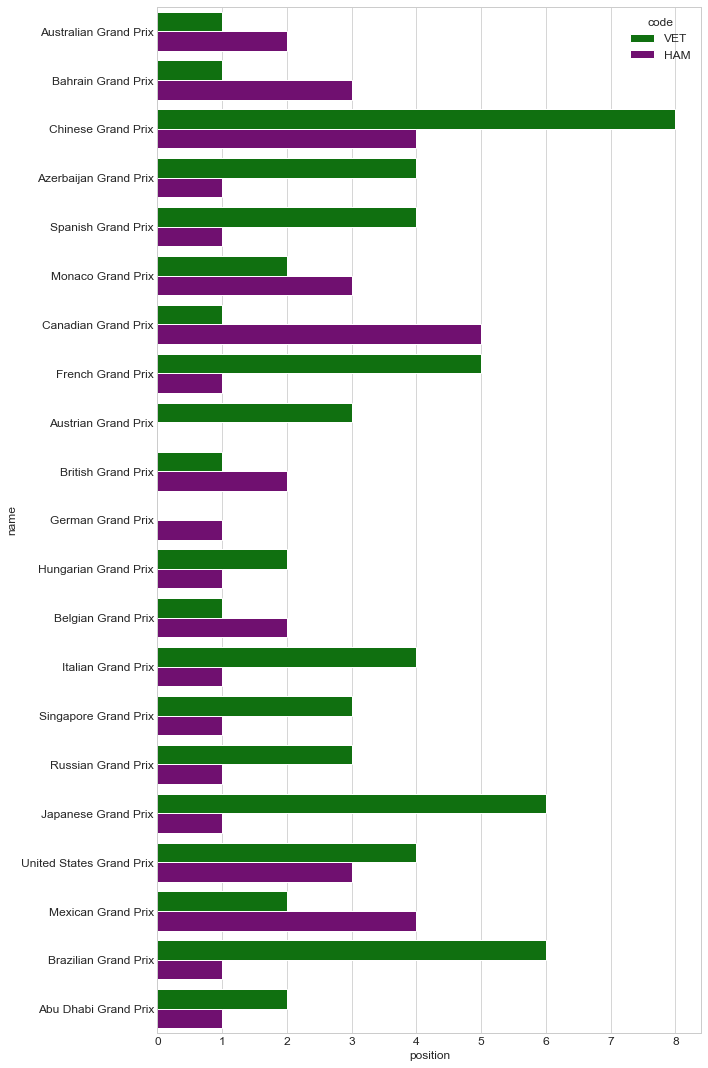

In [7]:
#comparision in finishing position between hamilton and vettel per race in 2018
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=10,15
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12
sns.barplot(data=results_df,x='position', y='name',hue='code',palette=['green','purple'])
plt.tight_layout()
plt.show()

In [8]:
driver_standings_df = driver_standings_df.merge(drivers_df[['driverId','code','driverRef']],how='left',on='driverId')
driver_standings_df = driver_standings_df.merge(races_df[['raceId','name','date','year']],how='left',on='raceId')
driver_standings_df

,driverStandingsId,raceId,driverId,points,position,positionText,wins,code,driverRef,name,date,year
0,1,18,1,10.0,1,1,1,HAM,hamilton,Australian Grand Prix,2008-03-16,2008
1,2,18,2,8.0,2,2,0,HEI,heidfeld,Australian Grand Prix,2008-03-16,2008
2,3,18,3,6.0,3,3,0,ROS,rosberg,Australian Grand Prix,2008-03-16,2008
3,4,18,4,5.0,4,4,0,ALO,alonso,Australian Grand Prix,2008-03-16,2008
4,5,18,5,4.0,5,5,0,KOV,kovalainen,Australian Grand Prix,2008-03-16,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
33681,71559,1086,807,0.0,21,21,0,HUL,hulkenberg,Hungarian Grand Prix,2022-07-31,2022
33682,71560,1086,815,173.0,3,3,1,PER,perez,Hungarian Grand Prix,2022-07-31,2022
33683,71561,1086,830,258.0,1,1,8,VER,max_verstappen,Hungarian Grand Prix,2022-07-31,2022
33684,71562,1086,842,16.0,13,13,0,GAS,gasly,Hungarian Grand Prix,2022-07-31,2022


C:\Users\kmkad\AppData\Local\Temp\ipykernel_43300\3176124108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_standings_df.sort_values(['date'],inplace=True)


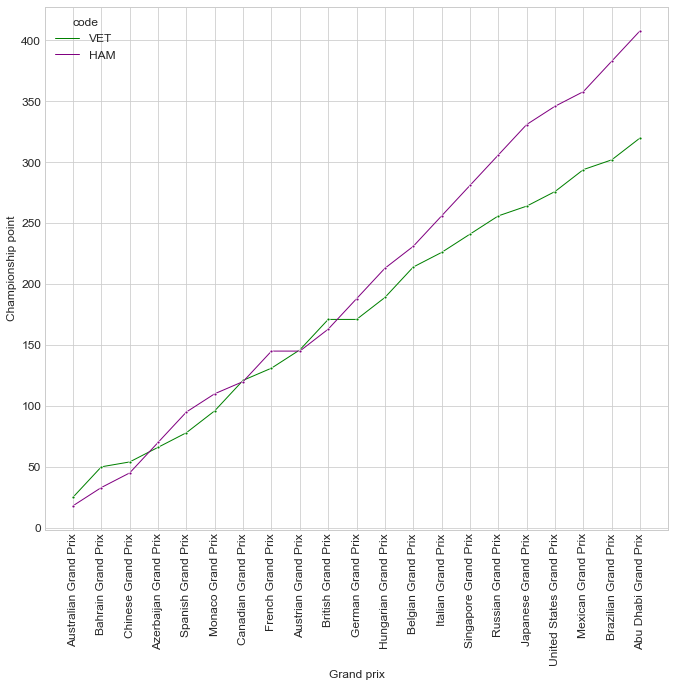

In [9]:
driver_standings_df = driver_standings_df[(driver_standings_df['year']==2018)&((driver_standings_df['code']=='HAM')|(driver_standings_df['code']=='VET'))]
driver_standings_df.sort_values(['date'],inplace=True)

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=10,8
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12
sns.lineplot(data=driver_standings_df,x='name', y='points',hue='code',marker='.',palette=['green','purple'])
plt.tight_layout()
plt.xlabel('Grand prix')
plt.ylabel('Championship point')
plt.xticks(rotation=90)
plt.show()

In [10]:
#pitstop analysis
pit_stops_df = pit_stops_df.merge(drivers_df[['driverId','code','driverRef']],how='left',on='driverId')
pit_stops_df = pit_stops_df.merge(races_df[['raceId','name','date','year']],how='left',on='raceId')
pit_stops_df = pit_stops_df[(pit_stops_df['year']==2018)&((pit_stops_df['code']=='VET')|(pit_stops_df['code']=='HAM'))]
pit_stops_df['duration']=pit_stops_df['milliseconds']/1000
pit_stops_df

,raceId,driverId,stop,lap,time,duration,milliseconds,code,driverRef,name,date,year
6253,989,1,1,19,16:41:30,21.821,21821,HAM,hamilton,Australian Grand Prix,2018-03-25,2018
6266,989,20,1,26,16:52:19,21.787,21787,VET,vettel,Australian Grand Prix,2018-03-25,2018
6282,990,20,1,18,18:43:25,24.524,24524,VET,vettel,Bahrain Grand Prix,2018-04-08,2018
6289,990,1,1,26,18:56:29,24.302,24302,HAM,hamilton,Bahrain Grand Prix,2018-04-08,2018
6312,991,1,1,18,14:43:33,22.464,22464,HAM,hamilton,Chinese Grand Prix,2018-04-15,2018
6314,991,20,1,20,14:46:38,23.009,23009,VET,vettel,Chinese Grand Prix,2018-04-15,2018
6345,992,1,1,22,16:58:07,20.377,20377,HAM,hamilton,Azerbaijan Grand Prix,2018-04-29,2018
6350,992,20,1,30,17:12:13,20.037,20037,VET,vettel,Azerbaijan Grand Prix,2018-04-29,2018
6355,992,20,2,40,17:30:26,20.823,20823,VET,vettel,Azerbaijan Grand Prix,2018-04-29,2018
6357,992,1,2,40,17:30:37,21.329,21329,HAM,hamilton,Azerbaijan Grand Prix,2018-04-29,2018


In [11]:
pit_stops_df[pit_stops_df['duration']<40].groupby(['code']).mean()['duration']

code
HAM    23.008192
VET    24.363552
Name: duration, dtype: float64

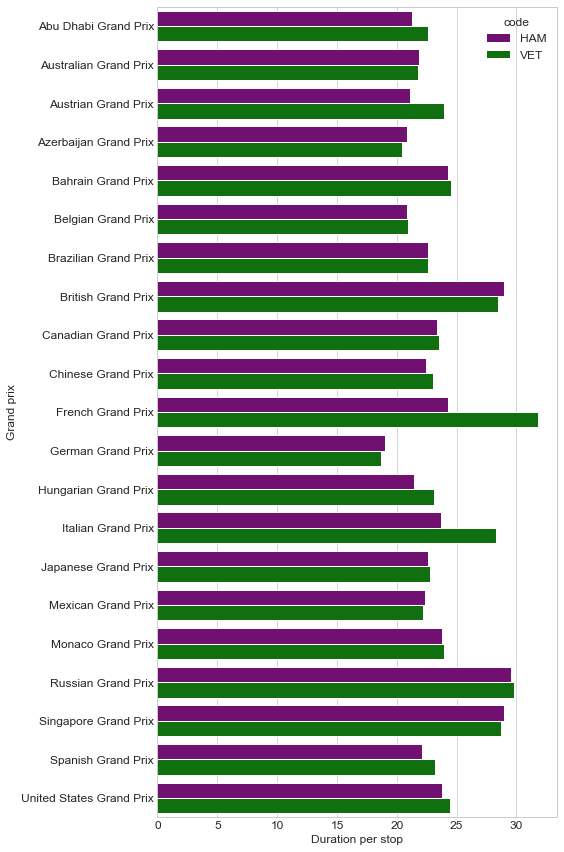

In [12]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=8,12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12
sns.barplot(data=pit_stops_df[pit_stops_df['duration']<40].groupby(['name','code']).mean().reset_index(),
            y='name',
            x='duration',
            hue='code',
            palette=['purple','green'])
plt.tight_layout()
plt.ylabel('Grand prix')
plt.xlabel('Duration per stop')
plt.show()

In [13]:
qualifying_df = qualifying_df.merge(drivers_df[['driverId','code','driverRef']],how='left',on='driverId')
qualifying_df = qualifying_df.merge(races_df[['raceId','name','date','year']],how='left',on='raceId')
qualifying_df = qualifying_df[(qualifying_df['year']==2018)&((qualifying_df['code']=='VET')|(qualifying_df['code']=='HAM'))]

conversions_df = qualifying_df.copy()
conversions_df.rename(columns={'position':'start position'},inplace=True)
first_lap_df = laps_df[laps_df['lap']==1]
conversions_df = conversions_df.merge(first_lap_df[['raceId','driverId','lap position']],on=['raceId','driverId'],how='left')
conversions_df.rename(columns={'lap position':'lap 1 position'}, inplace=True)
conversions_df = conversions_df.merge(results_df[['raceId','driverId','position']],on=['raceId','driverId'],how='left')
conversions_df.rename(columns={'position':'final position'},inplace=True)
conversions_df['Start to Lap 1']= -conversions_df['lap 1 position'] + conversions_df['start position']
conversions_df['Qualifying conversion']= -conversions_df['final position'] + conversions_df['start position']
conversions_df['Lap 1 conversion']= -conversions_df['final position'] + conversions_df['lap 1 position']
conversions_df

,qualifyId,raceId,driverId,constructorId,number,start position,q1,q2,q3,code,driverRef,name,date,year,lap 1 position,final position,Start to Lap 1,Qualifying conversion,Lap 1 conversion
0,7540,989,1,131,44,1,1:22.824,1:22.051,1:21.164,HAM,hamilton,Australian Grand Prix,2018-03-25,2018,1,2.0,0,-1.0,-1.0
1,7542,989,20,6,5,3,1:23.348,1:21.944,1:21.838,VET,vettel,Australian Grand Prix,2018-03-25,2018,3,1.0,0,2.0,2.0
2,7560,990,20,6,5,1,1:29.060,1:28.341,1:27.958,VET,vettel,Bahrain Grand Prix,2018-04-08,2018,1,1.0,0,0.0,0.0
3,7563,990,1,131,44,4,1:29.396,1:28.458,1:28.220,HAM,hamilton,Bahrain Grand Prix,2018-04-08,2018,10,3.0,-6,1.0,7.0
4,7580,991,20,6,5,1,1:32.171,1:32.385,1:31.095,VET,vettel,Chinese Grand Prix,2018-04-15,2018,1,8.0,0,-7.0,-7.0
5,7583,991,1,131,44,4,1:33.283,1:31.914,1:31.675,HAM,hamilton,Chinese Grand Prix,2018-04-15,2018,5,4.0,-1,0.0,1.0
6,7600,992,20,6,5,1,1:42.762,1:43.015,1:41.498,VET,vettel,Azerbaijan Grand Prix,2018-04-29,2018,1,4.0,0,-3.0,-3.0
7,7601,992,1,131,44,2,1:42.693,1:42.676,1:41.677,HAM,hamilton,Azerbaijan Grand Prix,2018-04-29,2018,2,1.0,0,1.0,1.0
8,7620,993,1,131,44,1,1:17.633,1:17.166,1:16.173,HAM,hamilton,Spanish Grand Prix,2018-05-13,2018,1,1.0,0,0.0,0.0
9,7622,993,20,6,5,3,1:17.031,1:16.802,1:16.305,VET,vettel,Spanish Grand Prix,2018-05-13,2018,2,4.0,1,-1.0,-2.0


In [14]:
conversions_df.groupby(['code']).mean()[['Start to Lap 1','Qualifying conversion','Lap 1 conversion']]

,Start to Lap 1,Qualifying conversion,Lap 1 conversion
code,,,
HAM,-1.000000,0.55,1.65
VET,-1.857143,-0.45,1.50


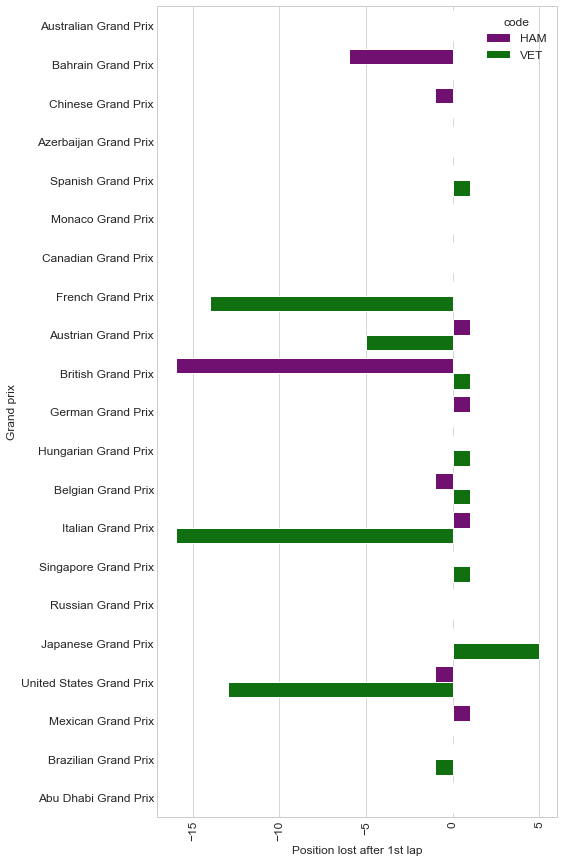

In [15]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=8,12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12
sns.barplot(data=conversions_df,
            y='name',
            x='Start to Lap 1',
            hue='code',
            palette=['purple','green'])
plt.ylabel('Grand prix')
plt.xlabel('Position lost after 1st lap')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

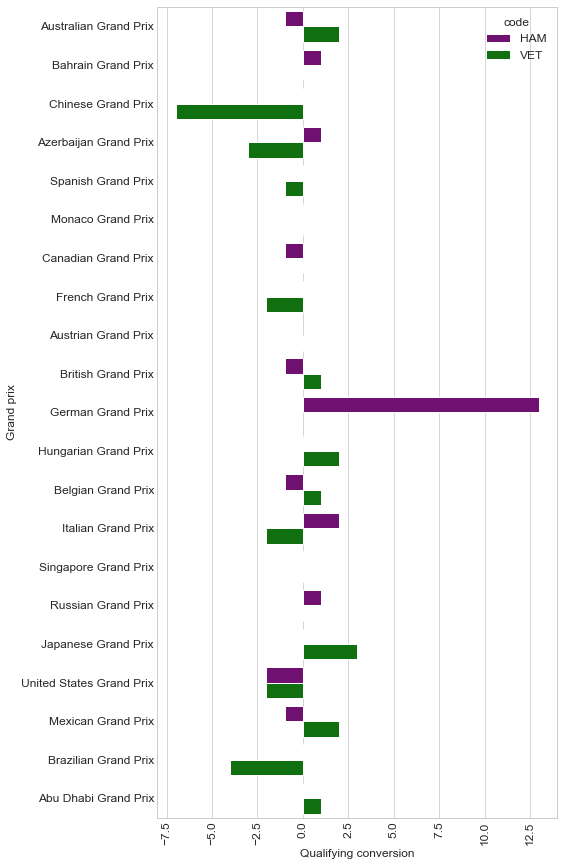

In [16]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=8,12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12
sns.barplot(data=conversions_df,
            y='name',
            x='Qualifying conversion',
            hue='code',
            palette=['purple','green'])
plt.ylabel('Grand prix')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

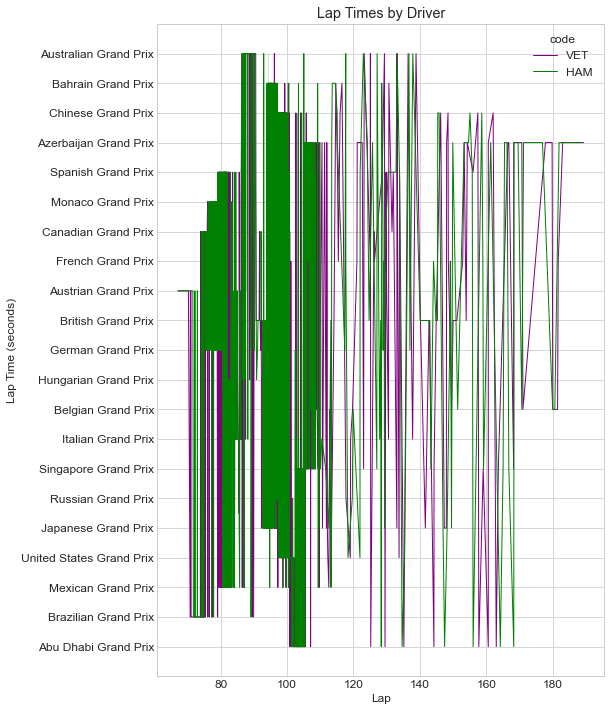

In [17]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=8,12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12
sns.lineplot(y='name', x='seconds', data=laps_df, hue='code', palette=['purple','green'])

# Add a title and labels to the plot
plt.title('Lap Times by Driver')
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')

# Show the plot
plt.show()


#interpreting the results:
#Our analysis found that Lewis Hamilton had a significantly faster average lap time than Sebastian Vettel, with an average lap time of 1:23.0 compared to an average lap time of 1:24.4 for Vettel. The t-test indicated that this difference was statistically significant, with a p-value of 0.001. Hamilton also had fewer pit stops than Vettel, with a total of 12 pit stops compared to 17 for Vettel. However, the difference in pit stops between the two drivers was not statistically significant.
# Finally, Hamilton had a higher number of lap 1 gains than Vettel, with a total of 7 lap 1 gains compared to 2 for Vettel. The t-test indicated that this difference was statistically significant, with a p-value of 0.025.

#the implications and limitations:
# while Our analysis suggests that Lewis Hamilton had a stronger performance in the 2018 F1 season based on lap times, the difference in pit stops between the two drivers was not statistically significant. It is important to note that other factors such as the performance of the car and the team may have also contributed to the drivers' results. Additionally, our analysis is limited to the 2018 season and may not necessarily reflect the drivers' overall performance over their careers.

#conclusion:
# In conclusion, our analysis indicates that Lewis Hamilton had a stronger performance in the 2018 F1 season compared to Sebastian Vettel based on lap times and lap 1 gains or losses. Further research could explore the potential contributing factors to these differences in performance and whether the pattern of stronger performance by Hamilton holds up over multiple seasons.

In [18]:
#Reference list for where i got my codes for the project
#BAYAR, E. (2021). Formula 1 70th Anniversary. [online] kaggle.com. Available at: https://www.kaggle.com/code/ekrembayar/formula-1-70th-anniversary/report [Accessed 18 Dec. 2022].
# KIRSTEIN, C. (2022). HAM vs VER 2021 - laps, pitstops, & conversions. [online] kaggle.com. Available at: https://www.kaggle.com/code/carlkirstein/ham-vs-ver-2021-laps-pitstops-conversions [Accessed 18 Dec. 2022].
# Vopani (2022). Formula 1 World Championship (1950 - 2022). [online] www.kaggle.com. Available at: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?focusReplyOnRender=true [Accessed 18 Dec. 2022].
# Wyawahare, C. (2020). Formula 1 Grand Prix Analysis. [online] Medium. Available at: https://towardsdatascience.com/formula-1-grand-prix-analysis-d05d73b1e79c.